# Analyse Polish Dataset


In [12]:
# | eval: false
import polars as pl
from datasets import Dataset, DatasetDict, load_dataset, load_from_disk

In [9]:
# | eval: false
path_ = '/home/stirunag/work/github/ML4-legal-documents/judgements_xml/'
dataset_path = path_+'en_judgements_dataset'
ds = load_from_disk(dataset_path)

In [10]:
ds

Dataset({
    features: ['_id', 'citation', 'signature', 'date', 'publicationDate', 'type', 'excerpt', 'content', 'judges', 'caseNumbers', 'citation_references', 'legislation', 'file_name', 'appeal_type', 'appeal_outcome', 'xml_uri', 'uri'],
    num_rows: 6154
})

In [16]:
df = ds.to_pandas()
pl_df = pl.DataFrame(df)

In [21]:
pl_df = pl_df.with_columns([
    pl.col("date").cast(pl.Utf8),
    pl.col("publicationDate").cast(pl.Utf8),
])

# Define date format
dt_fmt = "%Y-%m-%d %H:%M:%S%.f %Z"

# Perform column transformations
pl_df = pl_df.with_columns([
    pl.col("date").str.strptime(pl.Datetime, format=dt_fmt),
    pl.col("publicationDate").str.strptime(pl.Datetime, format=dt_fmt),
    pl.col("type").cast(pl.Categorical),
    pl.col("appeal_type").cast(pl.Categorical),
    pl.col("appeal_outcome").cast(pl.Categorical)
])

# Display the first few rows of the transformed DataFrame
print(pl_df.head())

shape: (5, 17)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ _id       ┆ citation  ┆ signature ┆ date      ┆ … ┆ appeal_ty ┆ appeal_ou ┆ xml_uri   ┆ uri      │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ pe        ┆ tcome     ┆ ---       ┆ ---      │
│ str       ┆ str       ┆ str       ┆ datetime[ ┆   ┆ ---       ┆ ---       ┆ str       ┆ str      │
│           ┆           ┆           ┆ ns]       ┆   ┆ cat       ┆ cat       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ ab0224364 ┆ [2008]    ┆ EWCA_Crim ┆ null      ┆ … ┆ null      ┆ null      ┆ https://c ┆ https:// │
│ e4cf6562c ┆ EWCA Crim ┆ _2952     ┆           ┆   ┆           ┆           ┆ aselaw.na ┆ caselaw. │
│ 82f8861d5 ┆ 2952      ┆           ┆           ┆   ┆           ┆           ┆ tionalarc ┆ national │
│ 268…      ┆           ┆           ┆           ┆   ┆           ┆           

In [22]:
# | eval: false
pl_df.describe()

statistic,_id,citation,signature,date,publicationDate,type,excerpt,content,judges,caseNumbers,citation_references,legislation,file_name,appeal_type,appeal_outcome,xml_uri,uri
str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str,str,str,str,str
"""count""","""6154""","""6154""","""6154""","""0""","""6154""","""6154""","""6058""","""6154""",6115.0,4934.0,1392.0,1826.0,"""6154""","""834""","""1368""","""6154""","""6154"""
"""null_count""","""0""","""0""","""0""","""6154""","""0""","""0""","""96""","""0""",39.0,1220.0,4762.0,4328.0,"""0""","""5320""","""4786""","""0""","""0"""
"""mean""",null,null,null,null,"""2013-10-13 09:46:09.320766""",null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""001d3b389f60bfd101c581fe8f1a9a…","""[2003] EWCA Crim 1""","""EWCA_(Crim)_1478""",null,"""2003-01-04 00:00:00""",null,"""********REPORTING RESTRICTIONS…",""" 2020] EWCA Crim 570 No: 20190…",null,null,null,null,"""2003_01_04-1.xml""",null,null,"""https://caselaw.nationalarchiv…","""https://caselaw.nationalarchiv…"
"""25%""",null,null,null,null,"""2008-06-11 00:00:00""",null,null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,"""2012-11-29 00:00:00""",null,null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,"""2019-06-07 00:00:00""",null,null,null,null,null,null,null,null,null,null,null,null
"""max""","""ffffb6552ad89849b5d2767708b5c2…","""[2024] EWCA Crim 99""","""Ewca_Crim_664""",null,"""2024-05-22 00:00:00""",null,"""…WARNING: reporting restrictio…","""…WARNING: reporting restrictio…",null,null,null,null,"""2024_05_22-6154.xml""",null,null,"""https://caselaw.nationalarchiv…","""https://caselaw.nationalarchiv…"


In [23]:
# | eval: false
pl_df["type"].value_counts()

type,count
cat,u32
"""crown_court""",5472
"""supreme_court""",660
"""martial_court""",11
"""high_court_administrative_cour…",2
"""high_court_division_court""",7
"""civil_criminal_court""",1
"""division_court""",1


In [24]:
pl_df["appeal_type"].value_counts()

appeal_type,count
cat,u32
"""conviction""",496
"""sentence""",338
null,5320


In [25]:
pl_df["appeal_outcome"].value_counts()

appeal_outcome,count
cat,u32
"""allowed""",697
"""refused""",65
"""dismissed""",586
null,4786
"""granted""",20


In [27]:
# | eval: false
print(f"Missing content: {pl_df['content'].null_count() / len(pl_df)}")
print(f"Missing excerpt: {pl_df['excerpt'].null_count() / len(pl_df)}")

Missing content: 0.0
Missing excerpt: 0.015599610009749756


<Axes: title={'center': 'Excerpt #chars distribution'}, ylabel='Frequency'>

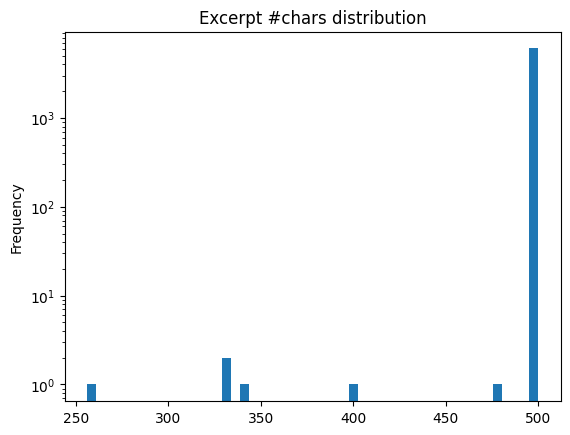

In [38]:
# | eval: false
pl_df["excerpt"].str.strip_chars().str.len_chars().to_pandas().plot.hist(
    bins=50, log=True, title="Excerpt #chars distribution"
)

In [32]:
pl_df["excerpt"]

excerpt
str
"""No. 2008/03296/A9 2008/03350/A…"
"""Neutral Citation Number: [2006…"
"""Neutral Citation Number: [2012…"
"""Neutral Citation Number: [2014…"
"""No: 201802356 A2 Neutral Citat…"
…
"""Neutral Citation Number: [2018…"
"""Case No: 2002/04091/D1 Neutral…"
"""Neutral Citation Number: [2010…"


In [33]:
pl_df["excerpt"].str.strip_chars().str.len_chars().to_pandas()

0       500.0
1       500.0
2       499.0
3       500.0
4       499.0
        ...  
6149    499.0
6150    500.0
6151    500.0
6152    499.0
6153    499.0
Name: excerpt, Length: 6154, dtype: float64